# What we'll cover

1 Types of probability

2 Probability distributions

3 Error

4 Central Limit Theorem & Confidence Intervals

5 Hypothesis testing

## Assignment

In [4]:
shell.exec("https://classroom.github.com/assignment-invitations/80d7d687d24fa2d9d5ef0471bf4261f3")

# Start of Day 1

# Types of probabilities

## Simple (frequentist) probabilities

Over a large number of trials, the frequency of some random event converges to a constant number that we call its probability 

In [1]:
set.seed(1357)

#shell.exec("https://en.wikipedia.org/wiki/Random_seed")

x = sample(c("tail","head"), size=10000, replace=TRUE)
est_prob = sum(x=="head")/length(x) 
est_prob

[1] 0.4964

In [3]:
#install.packages("ggplot2")
library(ggplot2)
cum_prob = cumsum(x=='head')/(1:length(x))
qplot(1:length(x), cum_prob, geom='line', ylim=c(0,1), 
      xlab = 'Number of experiments',
      ylab = 'Relative frequency for a head')

Installing package into 'C:/Users/ddb265/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


## Conditional probabilities

Probability of A given B occurred: P(A|B)

The probability that A and B both occur is the probability of the intersection of A and B: $P(A \cap B)$

When two events, A and B, are dependent, the probability of both occurring is

$P(A \cap B) = P(A) \cdot P(B \rvert A)$

$P(B \rvert A) = \frac{P(A  \cap  B)}{P(A)}$

the probability of rain tomorrow is 80%.

$P(R) = 0.8$ 

*if* it rains tomorrow, then the probability of lightning is 25%.

$P(L \rvert R) = 25\% = 0.25$

$P(L $ and $ R)$ = 

In [359]:
P.R = 0.8
P.LR = 0.25
P.LandR = P.LR * P.R
print(P.LandR)

[1] 0.2


There is a 0.80 probability it will snow tomorrow
and if it does, there is a 40% chance of them closing I-40
and if they close I-40, there will be a 80% chance it is closed for more than 2 hours
The probability of there being snow and I-40 is closed for more than 2 hours is

The probability of the intersection $P(A  \cap  B  \cap  C) = P(A)P(B \rvert A)P(C \rvert A \cap B)$

P(Snow and Close and Close>2 hrs) = P(Snow)P(Close|Snow)P(Close >2 hrs |Close and Snow) =

In [360]:
print((0.80)*(0.4)*(0.8))

[1] 0.256


#### Note: we will revisit conditional probabilities in "Intro to Bayes"

$P(A \cap B ) = P(A \rvert B) P(B) = P(B \rvert A) P(A)$

## Transition probabilities

### Bored students

We're in a classroom where students can be in 1 of 2 states: "alert" or "bored".
At any point in time, there is a certain probability that a student will become bored (0.2)
and a certain probability that a student will become alert (0.25)

Right now (t), there are 6 alert and 9 bored students in the class. 
Given the probabilities above, how many alert and bored students will there be in the next time step (t+1)?

In [361]:
ab = (6/15) * 0.2 #alert become bored
ba = (9/15) * 0.25 #bored become alert
aa = (6/15) * (1-.2) #alert stay alert
bb = (9/15) * (1-.25) #bored stay bored
sum(aa,bb,ab,ba)
cat("Number of bored = ", 15*(ab + bb), ", Number of alert = ", 15*(aa + ba))

[1] 1

Number of bored =  7.95 , Number of alert =  7.05

How do you solve this problem using linear algebra?

In [362]:
t1 = c(6/15, 9/15) #initial proportions of alert and bored students
print(t1)

[1] 0.4 0.6


In [363]:
#create a matrix of transitions
p = matrix(c(1-0.2,0.20,
             0.25,1-0.25), nrow = 2, ncol = 2)
p = t(p)
rownames(p) = c("alert then","bored then")
colnames(p) = c("alert now", "bored now")
print(p)

           alert now bored now
alert then      0.80      0.20
bored then      0.25      0.75


Then the new proportions is the vector - matrix product

In [364]:
t1[2]*p[2,1] + t1[1]*p[1,1]
t1[2]*p[2,2] + t1[1]*p[1,2]

[1] 0.47

[1] 0.53

In [365]:
t2 = t1 %*% p
print(t2)

     alert now bored now
[1,]      0.47      0.53


In [366]:
cat("Number of alert students is ", 15*t2[1])

Number of alert students is  7.05

In [367]:
cat("Number of bored students is ", 15*t2[2])

Number of bored students is  7.95

## Markov Chains

Markov chains are a very cool type of probabilistic model based on transition probabilities

You're doing some sequence stratigraphy work and you're counting transitions between 3 rock groups (sandstone, shale and limestone) in a stratigraphic column. You come up with the following transition frequency matrix

In [41]:
p = matrix(c(70, 20, 12,
             26,50,32, 
             50, 25, 50), nrow = 3, byrow=TRUE)

In [42]:
rownames(p) = c("sandstone", "shale", "limestone")
colnames(p) = rownames(p)

In [43]:
rowSums(p)

sandstone     shale limestone 
      102       108       125

In [44]:
# our transition probability matrix is
# the transition frequency matrix divided by row sums
p = p / rowSums(p)
p

,sandstone,shale,limestone
sandstone,0.6862745,0.1960784,0.1176471
shale,0.2407407,0.4629630,0.2962963
limestone,0.4000000,0.2000000,0.4000000


Given that we are in a sandstone layer, what is the probability being back in sandstone in exactly 2 strata?

In [62]:
# We can go sandstone -> sandstone
a = p[1,1] * p[1,1]
 
# shale -> sandstone (note that to we have to get the probability of going to sandstone from the shale)
b = p[2,1] * p[1,2]
 
# limestone -> sandstone
c = p[3,1] * p[1,3]
 
a + b + c    # The probability that we will be sandstone in 2 trips.

[1] 0.5652356

In [63]:
p %*% p

,sandstone,shale,limestone
sandstone,0.5652356,0.2488701,0.1858943
shale,0.3951868,0.3207980,0.2840152
limestone,0.4826580,0.2510240,0.2663181


Given that we are in a shale layer, what is the probability being in limestone in exactly 3 strata?

In [77]:
#install.packages("expm")
library(expm)

In [78]:
p5 = p %^% 3
p5

,sandstone,shale,limestone
sandstone,0.5221777,0.2632270,0.2145953
shale,0.4620419,0.2828082,0.2551499
limestone,0.4981948,0.2641172,0.2376880


In [79]:
p5[2,3]

[1] 0.2551499

Transition matrix $p ^ n$, will converge as $n$ increases, given that there are no 0's or 1's in our initial matrix.

In [81]:
p %^% 20

,sandstone,shale,limestone
sandstone,0.5004838,0.2686938,0.2308224
shale,0.5004838,0.2686938,0.2308224
limestone,0.5004838,0.2686938,0.2308224


This distribution, when the starting location is completely irrelevant, is known as the stationary distribution.

After a lot of transitions, no matter what your starting point, the likelihood of being in a sandstone strata is about 0.5

In [ ]:
#http://setosa.io/ev/markov-chains/

#### Note: we will revisit transition probabilities in "Linear Algebra" and "Time Series Analysis"

Markov chain monte carlo: tool used for sampling from a complicated distribution
First, a Markov chain is constructed and the steady-state probability distribution is found

# Probability distributions

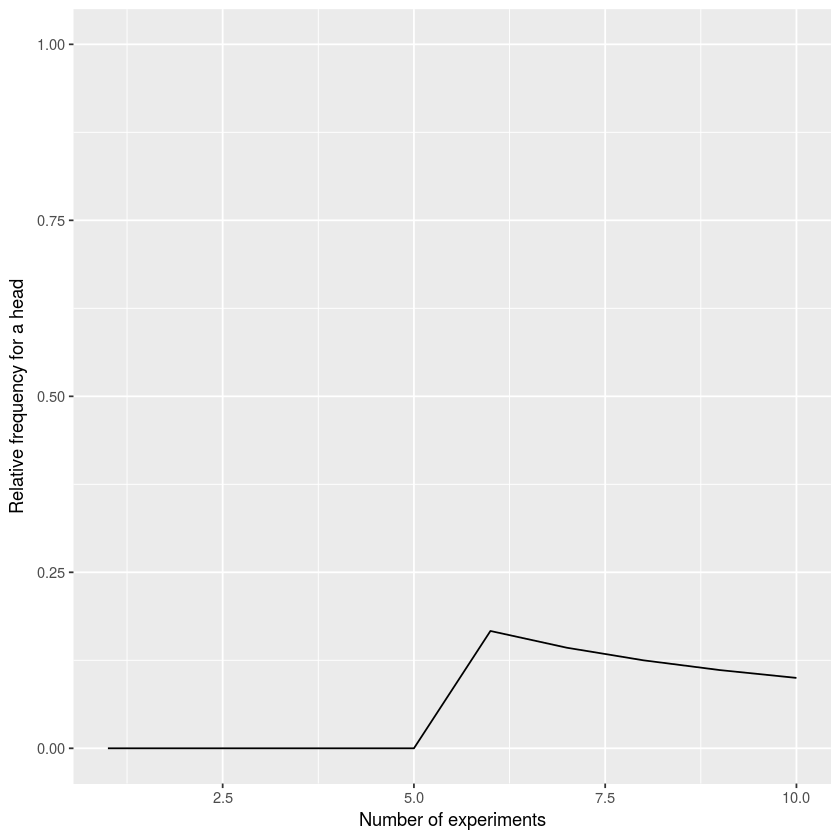

In [371]:
x = sample(c("tail","head"), size=10, replace=TRUE)
cum_prob = cumsum(x=='head')/(1:length(x))
qplot(1:length(x), cum_prob, geom='line', ylim=c(0,1), 
      xlab = 'Number of experiments',
      ylab = 'Relative frequency for a head')

We conduct an experiment where we flip a coin 5 times, 5000 times.
What is the probability that we flip 5 heads in 5 tosses?

In [372]:
no_of_experiments = 5000
no_of_events = rep(0,no_of_experiments) # Initializing the output vector
for(i in 1:no_of_experiments){
  x = sample(c('tail','head'), size=5, replace=TRUE)
  no_of_events[i] = sum(x=='head')
}
prob_of_5 = mean(no_of_events==5)
prob_of_5

[1] 0.033

What is the probability that we flip 0,1,2,3,4, and 5 heads in 5 tosses?

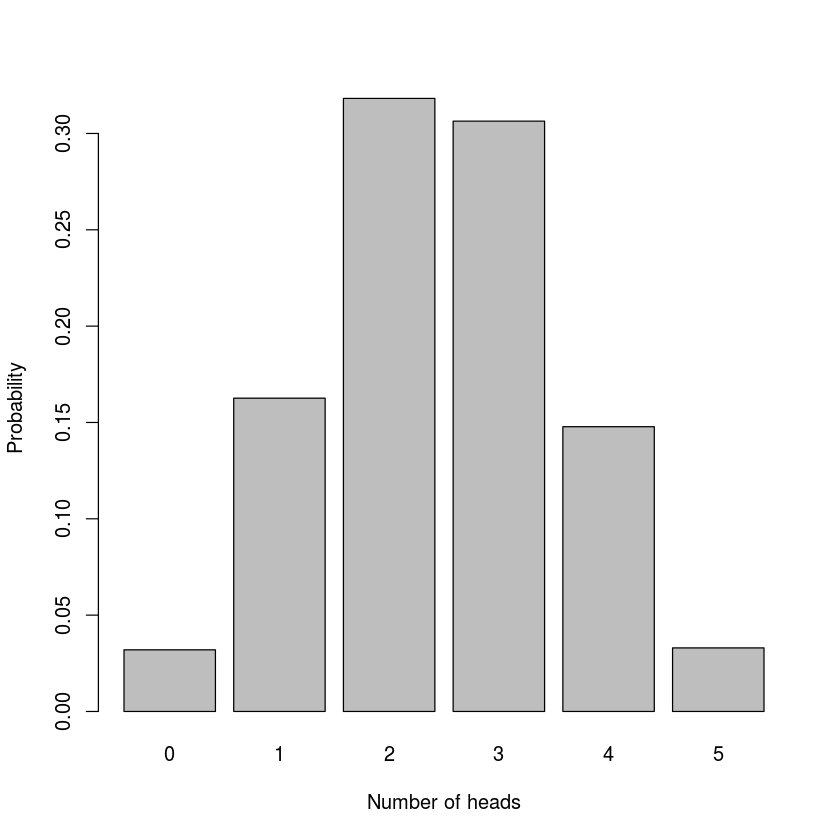

In [373]:
rel_freq = table(no_of_events)/length(no_of_events)
barplot(rel_freq, ylab='Probability', xlab='Number of heads')

In [374]:
round(rel_freq,2)

no_of_events
   0    1    2    3    4    5 
0.03 0.16 0.32 0.31 0.15 0.03 

### Binomial probability

The binomial distribution tells us that the probability of getting *m* successes in *n* trials when the success probability is *p* is

$C_{n,m}p^m(1-p)^{n-m}$

where $C_{m,n}$ are the binomial coefficients (the number of ways of picking *m* things out of *n*)

$C_{m,n} = \frac{n!}{m!(n-m)!}$

In [375]:
p = 0.5
m = c(0,1,2,3,4,5)
n = 5

Cmn = factorial(n)/(factorial(m)*factorial(n-m)) #long-hand way of saying "choose(n,m)"
print(Cmn)

pr = data.frame(outcome=m, binom_prob = Cmn*(p^m)*((1-p)^(n-m)))
print(pr)

[1]  1  5 10 10  5  1
  outcome binom_prob
1       0    0.03125
2       1    0.15625
3       2    0.31250
4       3    0.31250
5       4    0.15625
6       5    0.03125


In [376]:
# In R, the short-hand way to do the above is to binom
# dbinom gives the "probability mass function" for binomial distributions
binomial_prob = dbinom(m, size=5, prob=0.5)
out = data.frame(outcome=m, probability=binomial_prob, 
                  experimental_probability=unclass(rel_freq),
                  proportional_error = (unclass(rel_freq)-binomial_prob)/binomial_prob)
print(out)

  outcome probability experimental_probability proportional_error
0       0     0.03125                   0.0320            0.02400
1       1     0.15625                   0.1626            0.04064
2       2     0.31250                   0.3182            0.01824
3       3     0.31250                   0.3064           -0.01952
4       4     0.15625                   0.1478           -0.05408
5       5     0.03125                   0.0330            0.05600


### Yahtzeeee!!

You have 5 dice. What is the probability of rolling 1 six?

In [377]:
x = sample(c('1','2','3','4','5','6'), size=5, replace=TRUE)
print(x)
sum(x=='6')

[1] "5" "4" "2" "2" "5"


[1] 0

In [378]:
no_of_experiments = 50000
no_of_events = rep(0,no_of_experiments) # Initializing the output vector
for(i in 1:no_of_experiments){
  x = sample(c('1','2','3','4','5','6'), size=5, replace=TRUE)
  no_of_events[i] = sum(x=='6')
}
prob_of_6 = mean(no_of_events==1)
prob_of_6

[1] 0.4053

What is the probability of rolling 6 sixes?

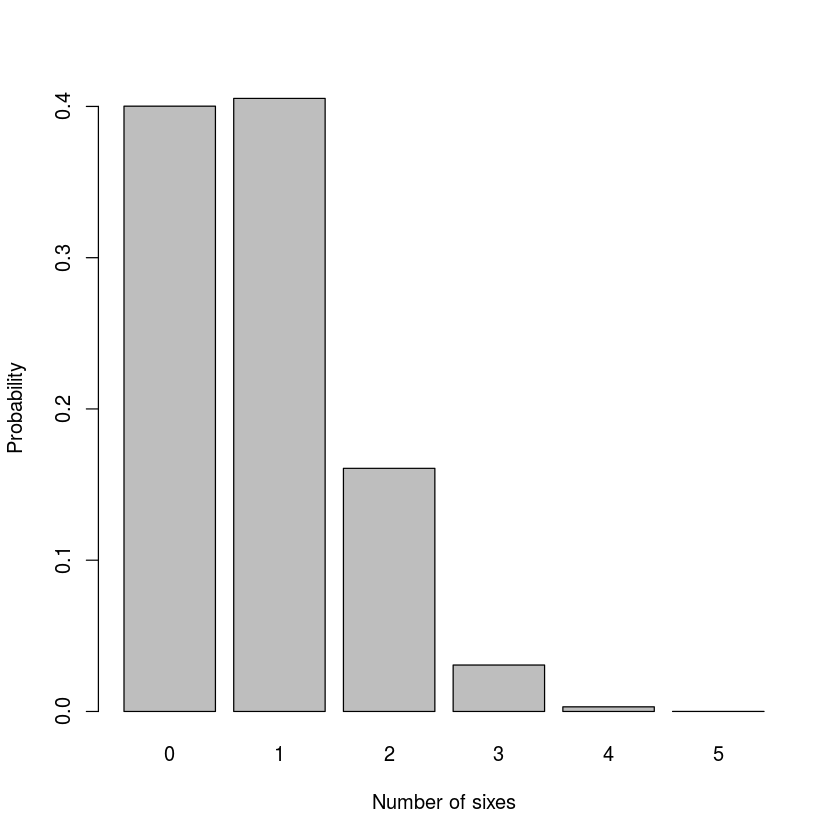

In [379]:
rel_freq = table(no_of_events)/length(no_of_events)
barplot(rel_freq, ylab='Probability', xlab='Number of sixes')

In [380]:
p = 1/6 #= chance of getting a specific number 
q = 1-p #= 5/6 = chances of failing to get a specific number

Theoretical answer? Use the binomial probability function

In [381]:
m = c(0,1,2,3,4,5)
n = 5
binom_prob = Cmn*(p^m)*((1-p)^(n-m))
print(binom_prob * 100)

[1] 40.18775720 40.18775720 16.07510288  3.21502058  0.32150206  0.01286008


which is the same as expanding $(p + q)^5$

In [382]:
theo = c(q^5, (5*p)*(q^4), (10*p^2)*(q^3), (10*p^3)*(q^2), (5*p^4)*(q), (p^5))

print(theo * 100)

[1] 40.18775720 40.18775720 16.07510288  3.21502058  0.32150206  0.01286008


In [383]:
# how does it compare to the experimental?
print (rel_freq*100)

no_of_events
     0      1      2      3      4      5 
40.016 40.530 16.074  3.070  0.306  0.004 


## Normal Distribution

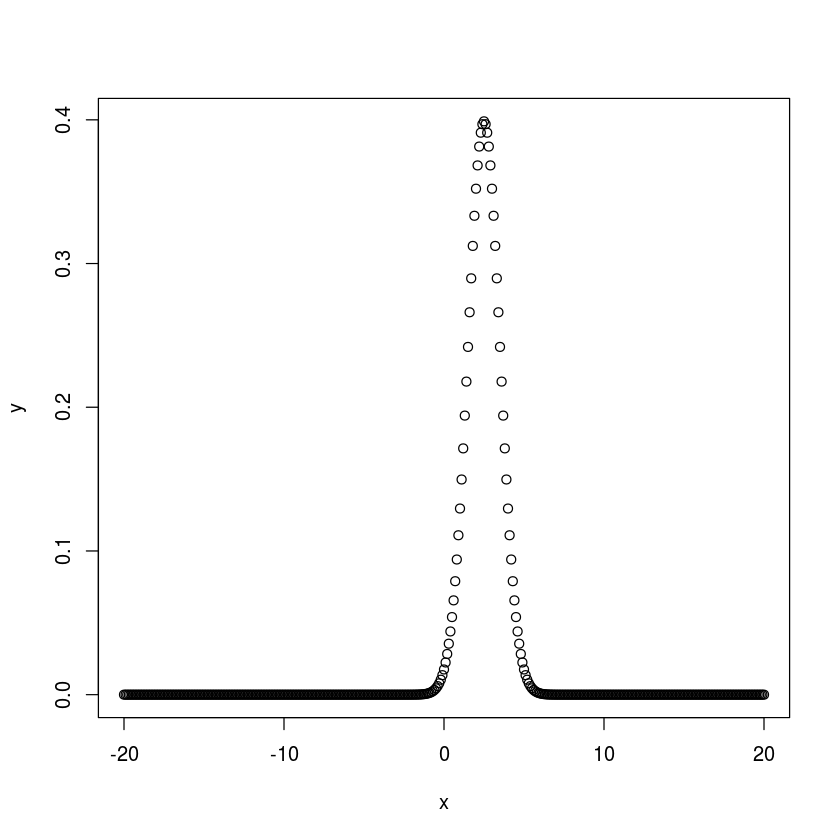

In [384]:
x = seq(-20,20,by=.1)
y = dnorm(x, mean=2.5,sd=1)
plot(x,y)

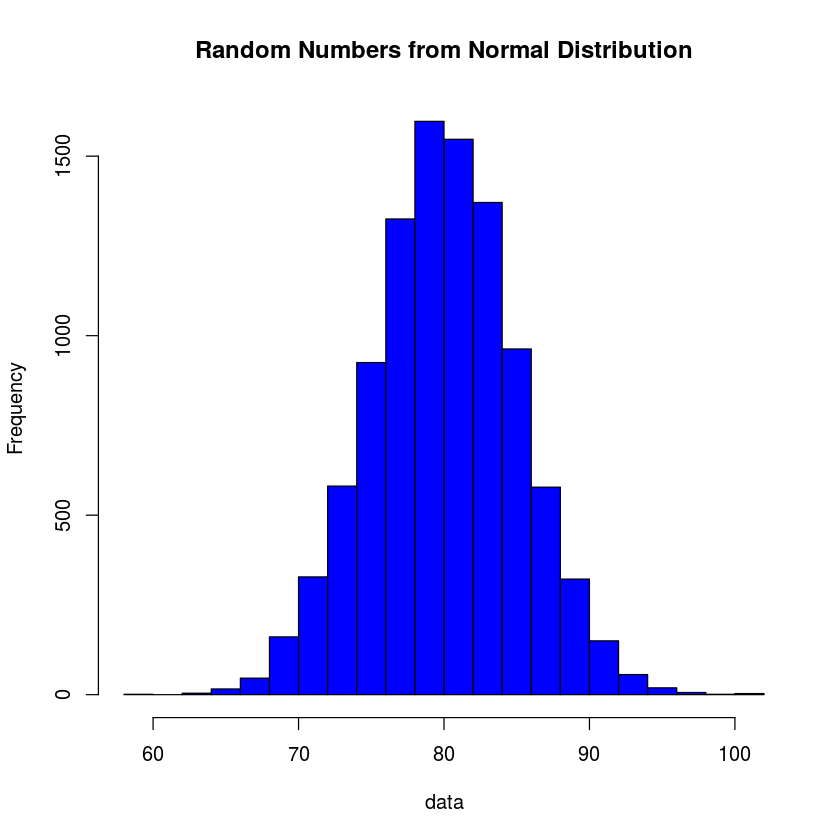

In [385]:
data = rnorm(10000, mean = 80, sd = 5)
hist(data, nclass = 20, col = "blue", main = "Random Numbers from Normal Distribution")

### Testing for normality

The data are fitted against a theoretical distribution in such as way that the points should form approximately a straight line

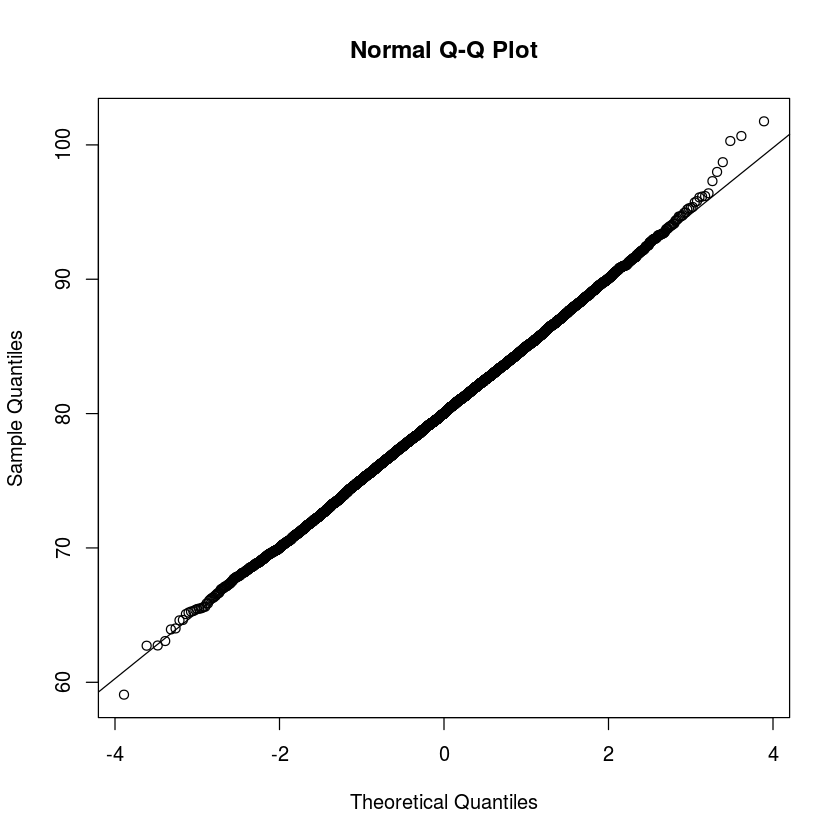

In [386]:
qqnorm(data)
qqline(data)

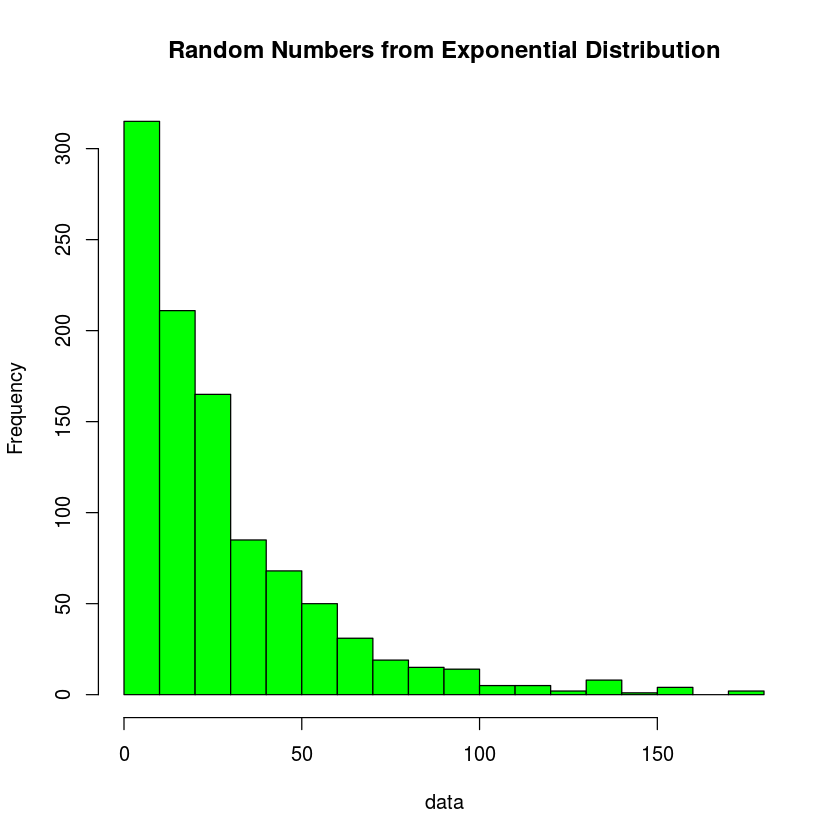

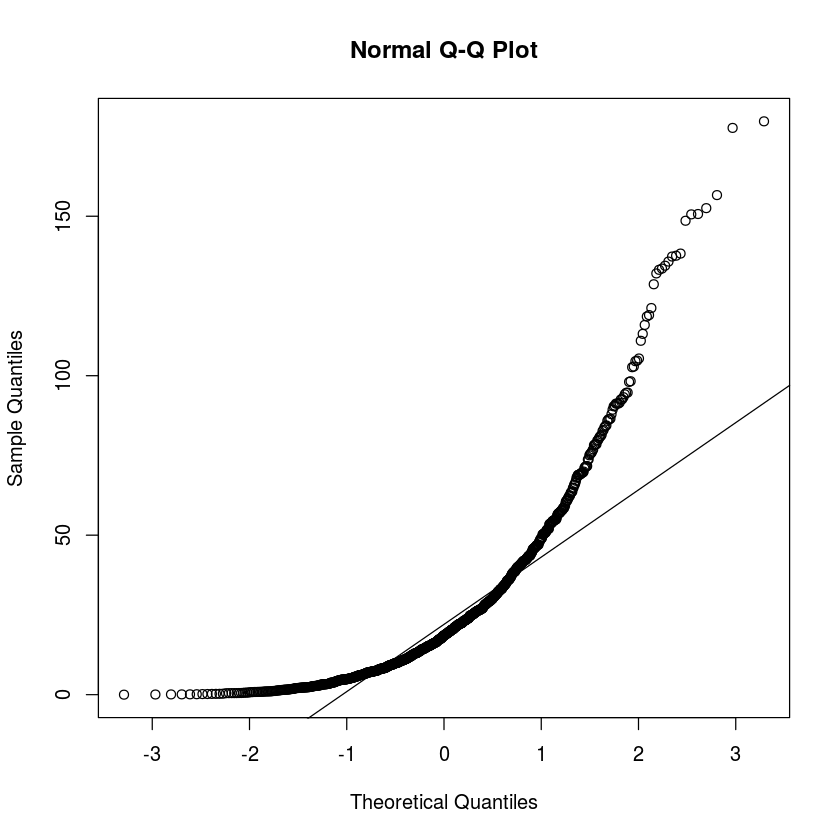

In [387]:
mean = 25
data = rexp(1000, rate = 1/mean)
hist(data, nclass = 20, col = "green", main = "Random Numbers from Exponential Distribution")

qqnorm(data)
qqline(data)

# Start of Day 2

## dataRetrieval package

In [ ]:
#install.packages("dataRetrieval")
#install.packages("ggplot2")
#install.packages("fitdistrplus")
#install.packages("car")

In [ ]:
shell.exec("https://waterdata.usgs.gov/nwis")

In [ ]:
shell.exec("https://owi.usgs.gov/R/dataRetrieval.html#1")

## Poisson Distribution

The Poisson distribution is the probability distribution of independent event occurrences in an interval. 
If $\lambda$ is the mean occurrence per interval, then the probability of having $k$ occurrences within a given interval is:

${\displaystyle P(k{\text{ events in interval}})={\frac {\lambda ^{k}e^{-\lambda }}{k!}}}$

The mean (and variance) of events in an interval is designated $\lambda$  (lambda). Lambda is the event rate, also called the rate parameter. The standard deviation is $\sqrt{\lambda}$

In [388]:
#help(Poisson)

A bar chart of the distribution of the Poisson random variable with parameter $\lambda$ = 0.3 can be obtained using

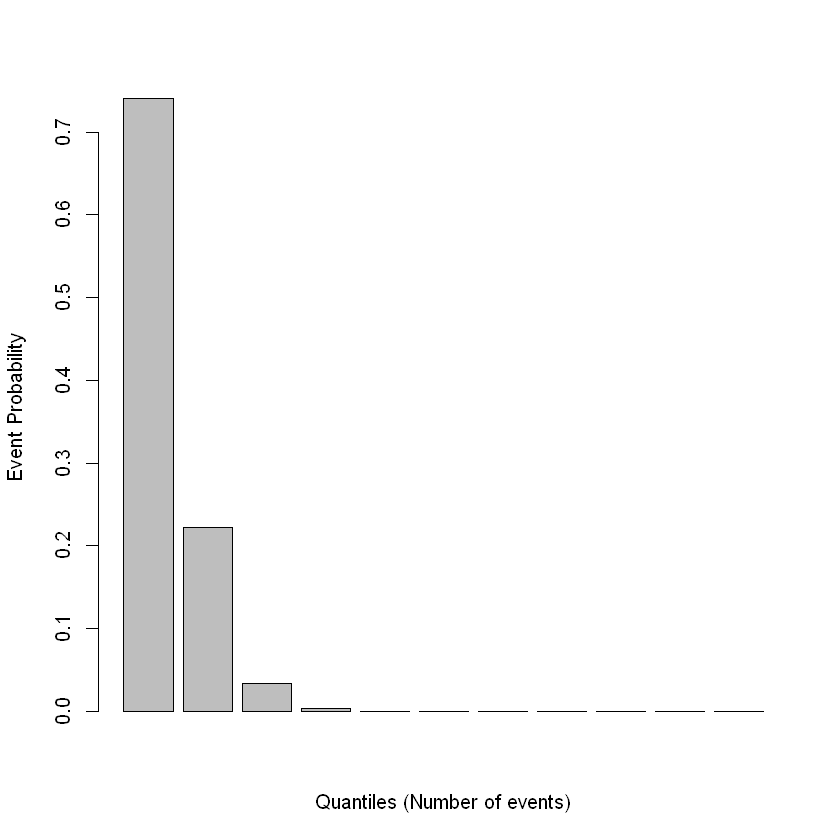

In [8]:
 barplot(dpois(0:10, lambda=0.3), xlab='Quantiles (Number of events)', ylab='Event Probability')

what do you notice by changing the lambda parameter?
smaller lambda 'drop off' more quickly than large lambda

In [9]:
X = rpois(1000, 0.5)
# mean of X should be ~0.5
print (mean(X))

[1] 0.49


Some uses:

1.rare events (floods, storm surges)

2.counts/rates (number of meteorite impacts per km$^2$, number of particles emitted from radioactive material per unt time)

rule of thumb: counting processes (number of photons landing on a photodiode), spatial densities, and return intervals

We're going to use flow records from the Colorado River in Grand Canyon to look at return intervals using a Poisson distribution

In [10]:
#install.packages("dataRetrieval")
library(dataRetrieval)

#https://waterdata.usgs.gov/usa/nwis/uv?09380000
siteNo = "09380000"
pCode = "00060"
start.date = "2014-01-01"
end.date = "2017-01-01"

lf = readNWISdata(siteNumbers = siteNo,
                     parameterCd = pCode,
                     startDate = start.date,
                     endDate = end.date,
                     service = "dv")

lf = renameNWISColumns(lf)
names(lf)

[1] "agency_cd"   "site_no"     "dateTime"    "Flow_Max"    "Flow_Max_cd"
 [6] "Flow_Min"    "Flow_Min_cd" "Flow"        "Flow_cd"     "tz_cd"

In [11]:
head(lf)

agency_cd,site_no,dateTime,Flow_Max,Flow_Max_cd,Flow_Min,Flow_Min_cd,Flow,Flow_cd,tz_cd
USGS,09380000,2014-01-01,15200,A,8570,A,11600,A,UTC
USGS,09380000,2014-01-02,16100,A,8830,A,13400,A,UTC
USGS,09380000,2014-01-03,16600,A,8680,A,13500,A,UTC
USGS,09380000,2014-01-04,16100,A,8750,A,12700,A,UTC
USGS,09380000,2014-01-05,15600,A,8790,A,12100,A,UTC
USGS,09380000,2014-01-06,16600,A,8790,A,13500,A,UTC


In [106]:
summary(lf)

  agency_cd           site_no             dateTime             Flow_Max    
 Length:1097        Length:1097        Min.   :2014-01-01   Min.   : 8280  
 Class :character   Class :character   1st Qu.:2014-10-02   1st Qu.:12700  
 Mode  :character   Mode  :character   Median :2015-07-03   Median :14200  
                                       Mean   :2015-07-03   Mean   :14731  
                                       3rd Qu.:2016-04-02   3rd Qu.:17100  
                                       Max.   :2017-01-01   Max.   :38400  
 Flow_Max_cd           Flow_Min     Flow_Min_cd             Flow      
 Length:1097        Min.   : 5540   Length:1097        Min.   : 7180  
 Class :character   1st Qu.: 7390   Class :character   1st Qu.:10200  
 Mode  :character   Median : 8680   Mode  :character   Median :11900  
                    Mean   : 9001                      Mean   :12111  
                    3rd Qu.: 9980                      3rd Qu.:13700  
                    Max.   :37700         

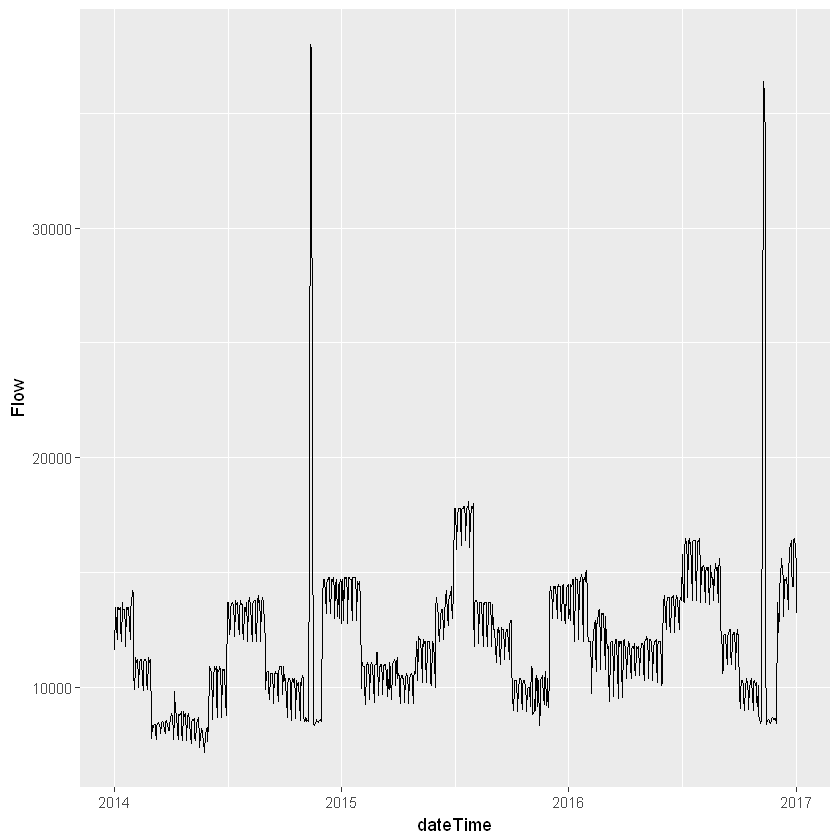

In [14]:
library(ggplot2)
ts = ggplot(data = lf,
             aes(dateTime, Flow)) + geom_line()
ts

In [15]:
input_data = lf$Flow #daily mean flow

Probability of having k occurrences of a thing within a given interval 

Let's compare the probability of 2 days per month with flow above 15,000 c.f.s with the probability 1 day per month with flow above 20,000 c.f.s

In [19]:
# what is the probability of 2 days per month with flow above 15,000 c.f.s?
thres = 15000 #cfs
k = 2

# how to I compute lambda?
# define rate as the number of flows above 15,000 c.f.s in the measurement period (days/month)

# I want a vector of the days, increasing from day 1 to day N
days = seq(nrow(lf)) #sequence of days

head(days)

num_months = length(input_data)/30 #number of days / days in month

print(num_months)

# define rate as the number of flows above 15,000 c.f.s in the measurement period (days/month)
lambda = length(days[input_data>thres]) / num_months
print(lambda)

# calculate
pr = (lambda^k * exp(-lambda)) / factorial(k)

cat('Probability of', k, 'days per month over', thres, 'c.f.s is', pr)

[1] 1 2 3 4 5 6

[1] 36.56667
[1] 2.652689
Probability of 2 days per month over 15000 c.f.s is 0.2479102

In [23]:
# the 'R' function is dpois. Remember, "d" stands for density
dpois(k, lambda)

[1] 0.2479102

In [24]:
# ppois gives you the cumulative distribution, P(X <= x)
# so the probability of 0, 1, or 2 days per month over 15,000 cfs is
ppois(k, lambda)

[1] 0.5052841

In [25]:
# Is it more likely to have 1 day per month with flow above 20,000 c.f.s?
thres = 20000
k = 1

lambda = length(days[input_data>thres]) / num_months
print(lambda)

#pr = (lambda^k * exp(-lambda)) / factorial(k)
pr = dpois(k, lambda)

cat('Probability of', k, 'days per month over', thres, 'c.f.s is', pr)

[1] 0.2461258
Probability of 1 days per month over 20000 c.f.s is 0.192427

## Weibull Distribution

The Weibull distribution with shape parameter a and scale parameter b has density given by

$f(x) = (a/b) (x/b)^{a-1} \exp(- (x/b)^a)$

probabilities of extreme values (temperature, wind speed, sea level, etc)

In [113]:
#help(Weibull)

Peak flow data are instantaneous discharge or stage data that record the maximum values of these
variables during a flood event. They include the annual peak flood event but can also include records
of other peaks that are lower than the annual maximum

In [26]:
# paria river flow. peak flow data goes back to 1924
#https://waterdata.usgs.gov/nwis/uv?site_no=09382000
siteNo = "09382000"

peakData = readNWISpeak(siteNumbers = siteNo)

peakData = renameNWISColumns(peakData)

In [27]:
comment(peakData)

[1] "#"                                                                                        
 [2] "# U.S. Geological Survey"                                                                 
 [3] "# National Water Information System"                                                      
 [4] "# Retrieved: 2017-02-08 13:08:55 EST"                                                     
 [5] "#"                                                                                        
 [6] "# ---------------------------------- WARNING ----------------------------------------"    
 [7] "# Some of the data that you have obtained from this U.S. Geological Survey database"      
 [8] "# may not have received Director's approval. Any such data values are qualified"          
 [9] "# as provisional and are subject to revision. Provisional data are released on the"       
[10] "# condition that neither the USGS nor the United States Government may be held liable"    
[11] "# for any damages resulting from its use."                                                
[12] "#"                                                                                        
[13] "# More data may be available offline."                                                    
[14] "# For more information on these data,  contact  USGS Water Data Inquiries."               
[15] "# This file contains the annual peak streamflow data."                                    
[16] "#"                                                                                        
[17] "# This information includes the following fields:"                                        
[18] "#"                                                                                        
[19] "#  agency_cd     Agency Code"                                                             
[20] "#  site_no       USGS station number"                                                     
[21] "#  peak_dt       Date of peak streamflow (format YYYY-MM-DD)"                             
[22] "#  peak_tm       Time of peak streamflow (24 hour format, 00:00 - 23:59)"                 
[23] "#  peak_va       Annual peak streamflow value in cfs"                                     
[24] "#  peak_cd       Peak Discharge-Qualification codes (see explanation below)"              
[25] "#  gage_ht       Gage height for the associated peak streamflow in feet"                  
[26] "#  gage_ht_cd    Gage height qualification codes"                                         
[27] "#  year_last_pk  Peak streamflow reported is the highest since this year"                 
[28] "#  ag_dt         Date of maximum gage-height for water year (if not concurrent with peak)"
[29] "#  ag_tm         Time of maximum gage-height for water year (if not concurrent with peak" 
[30] "#  ag_gage_ht    maximum Gage height for water year in feet (if not concurrent with peak" 
[31] "#  ag_gage_ht_cd maximum Gage height code"                                                
[32] "#"                                                                                        
[33] "# Sites in this file include:"                                                            
[34] "#  USGS 09382000 PARIA RIVER AT LEES FERRY, AZ"                                           
[35] "#"                                                                                        
[36] "# Peak Streamflow-Qualification Codes(peak_cd):"                                          
[37] "#   1 ... Discharge is a Maximum Daily Average"                                           
[38] "#   2 ... Discharge is an Estimate"                                                       
[39] "#   3 ... Discharge affected by Dam Failure"                                              
[40] "#   4 ... Discharge less than indicated value,"                                           
[41] "#           which is Minimum Recordable Discharge at this site"                           
[42] "#   5 ... Discharg

In [28]:
head(peakData)
tail(peakData)
length(peakData$peak_va)

agency_cd,site_no,peak_dt,peak_tm,peak_va,peak_cd,gage_ht,gage_ht_cd,year_last_pk,ag_dt,ag_tm,ag_gage_ht,ag_gage_ht_cd,peak_dateTime
USGS,09382000,1924-09-10,NA,4330,E,6.0,3,NA,NA,NA,NA,NA,NA
USGS,09382000,1925-09-19,NA,4800,E,6.5,3,NA,NA,NA,NA,NA,NA
USGS,09382000,1925-10-05,NA,16100,E,16.3,6,NA,NA,NA,NA,NA,NA
USGS,09382000,1927-09-13,NA,14300,E,16.0,NA,NA,NA,NA,NA,NA,NA
USGS,09382000,1928-07-16,NA,2960,E,7.5,NA,NA,NA,NA,NA,NA,NA
USGS,09382000,1929-08-02,NA,12000,NA,13.8,NA,NA,NA,NA,NA,NA,NA


,agency_cd,site_no,peak_dt,peak_tm,peak_va,peak_cd,gage_ht,gage_ht_cd,year_last_pk,ag_dt,ag_tm,ag_gage_ht,ag_gage_ht_cd,peak_dateTime
87,USGS,09382000,2010-08-08,22:57,5620,NA,10.83,NA,NA,NA,NA,NA,NA,2010-08-08 22:57:00
88,USGS,09382000,2010-10-06,NA,3640,NA,9.71,NA,NA,NA,NA,NA,NA,NA
89,USGS,09382000,2012-08-20,NA,2290,NA,8.73,NA,NA,NA,NA,NA,NA,NA
90,USGS,09382000,2013-09-11,NA,5890,NA,13.40,NA,NA,NA,NA,NA,NA,NA
91,USGS,09382000,2014-09-28,073630,6210,NA,13.78,NA,NA,NA,NA,NA,NA,2014-09-28 07:36:30
92,USGS,09382000,2015-09-15,19:15,2040,NA,8.70,NA,NA,NA,NA,NA,NA,2015-09-15 19:15:00


[1] 92

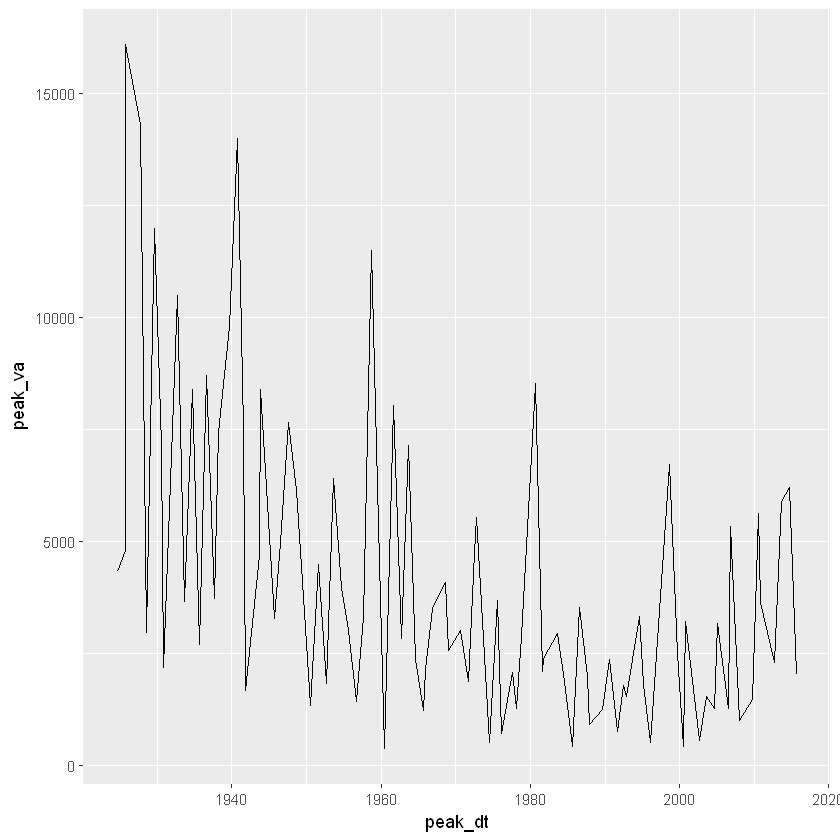

In [29]:
#We're interested in working with daily max values
ts = ggplot(data = peakData,
             aes(peak_dt, peak_va)) +
      geom_line()
ts

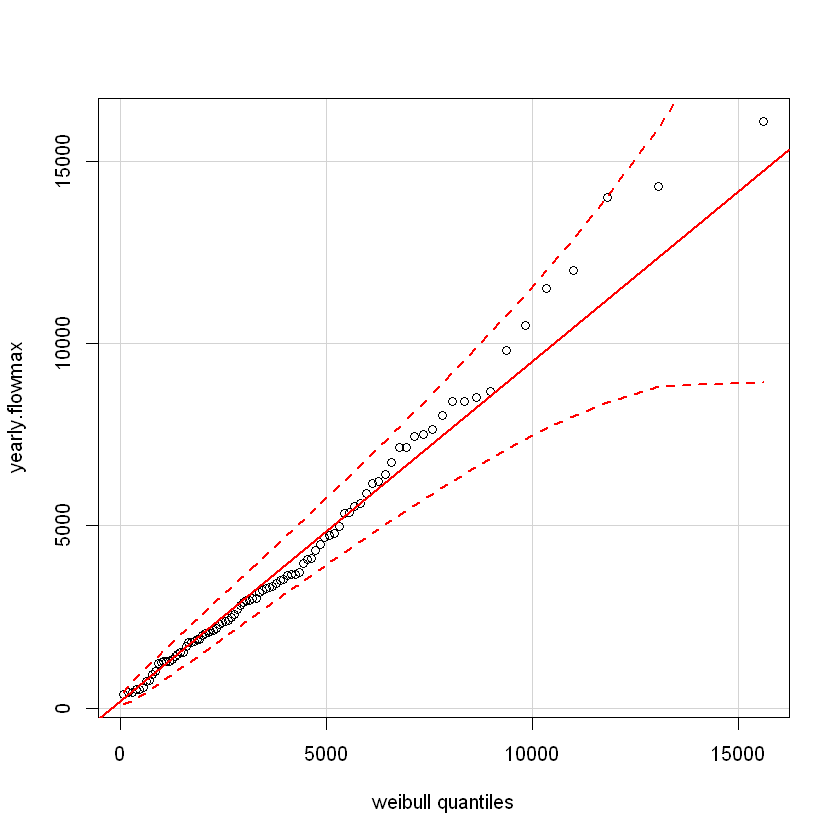

In [32]:
yearly.flowmax = peakData$peak_va

# parameter estimation
# finding the parameters of a probability model from your data
# R excels in this.
library(MASS)
gf = fitdistr(yearly.flowmax, densfun="weibull", lower = 0)

#install.packages("car")
# car stands for "companion to applied regression"
# allows us to do a qq (quantile-quantile) plot for a weibull distribution
library(car)

# qq-plot for annual flow maxima
qqPlot(yearly.flowmax , distribution="weibull", scale=gf$estimate[2], shape=gf$estimate[1])

As you can see, the Weibull distribution fits the data well.

What are the dashed lines? They are confidence intervals. If our observations fall within them, we are 95% confident that the data fit the model at that quantile

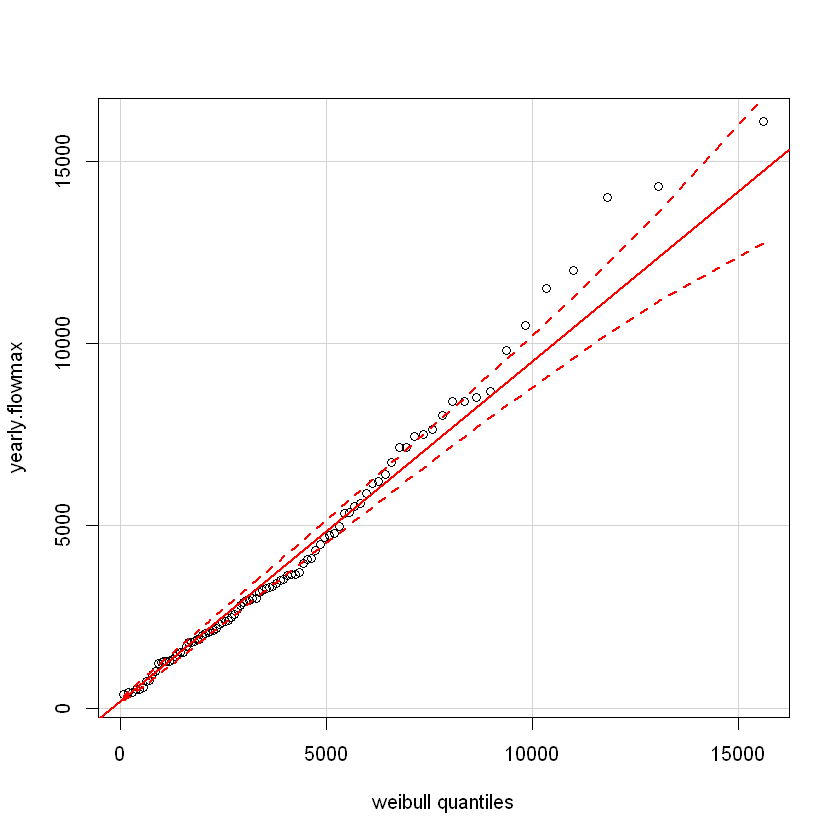

In [36]:
# if we change the confidence interval to 0.5, the envelope narrows. 
# Why? Because that's the level at which there is 50% uncertainty that the data fit the model (instead of 5%)
qqPlot(yearly.flowmax , distribution="weibull", scale=gf$estimate[2], shape=gf$estimate[1], envelope=.5)

Loading required package: survival


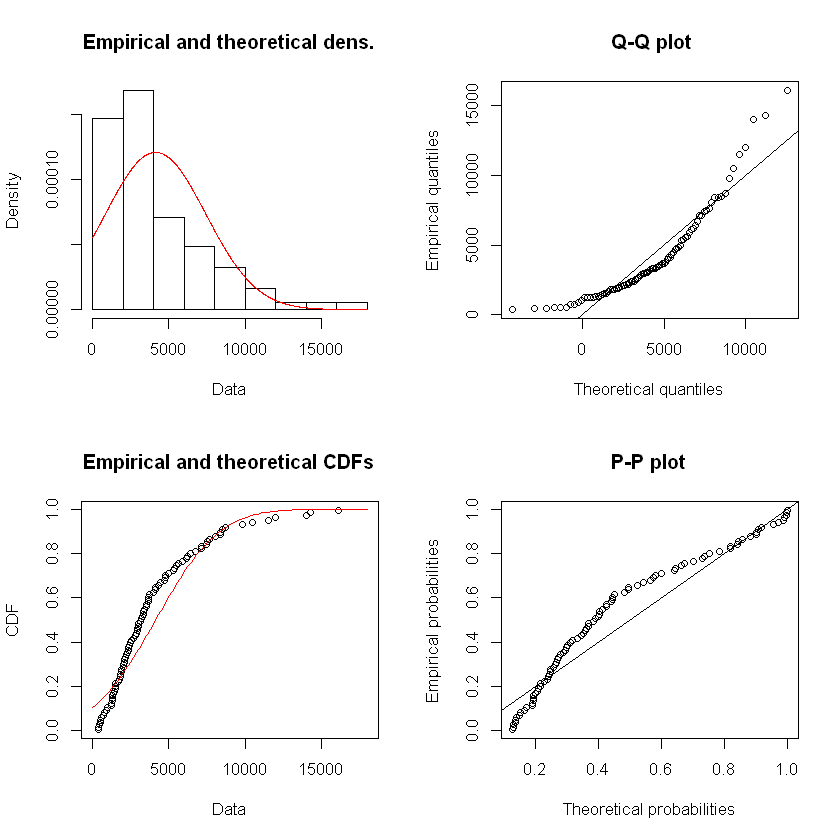

In [38]:
# the fitdistrplus also does parameter estimation but allows us to make more fancy graphs
#install.packages("fitdistrplus")
library(fitdistrplus)

#for comparative purposes, we'll fit a normal distribution to the same data
norm.fit = fitdist(yearly.flowmax, "norm")
plot(norm.fit)

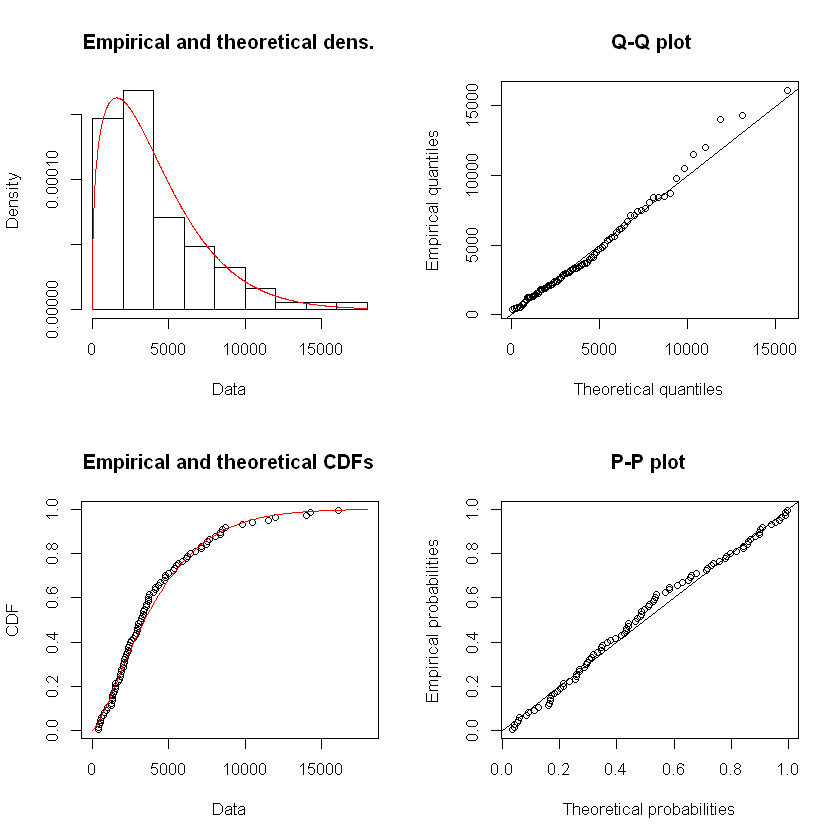

In [39]:
weibull.fit = fitdist(yearly.flowmax , "weibull")
plot(weibull.fit)

In [41]:
## Null hypothesis: the sample is compatible with a (Weibull | Normal) distribution

# 'goodness-of-fit' statistic (part of the fitdistrplus package)
gf = gofstat(list(weibull.fit, norm.fit))

## Kolmogorov-Smirnov-Test (KS-Test)
# used to compare a sample with a reference probability distribution (compares cumulative probability distributions)
gf$kstest

1-mle-weibull     2-mle-norm 
"not rejected"     "rejected"

## Exponential Distribution

$f(x) = \lambda e^{-\lambda x}$

The areas in thousands of square miles of the landmasses which exceed 10,000 square miles. lambda is a rate

In [42]:
data(islands)

In [43]:
#install.packages("fitdistrplus")
#library(fitdistrplus)

In [50]:
#convert square miles to square km
islands = islands * 2.58999
exp.fit = fitdistr(islands, "exponential")

#exp.fit = fitdist(yearly.flowmax, "exponential")

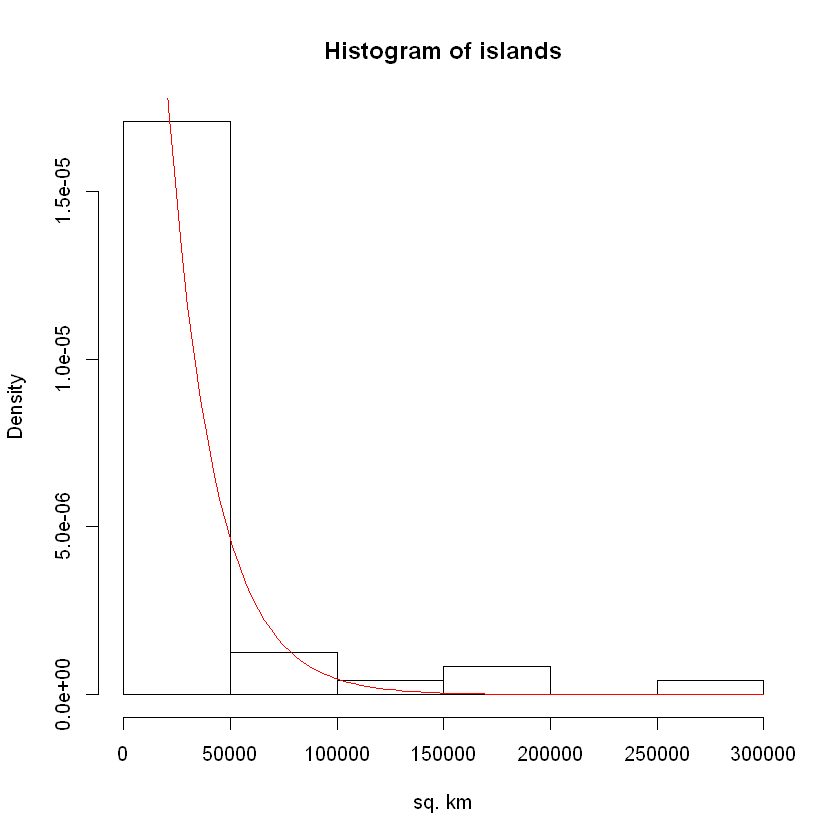

In [51]:
hist(islands, freq = FALSE, xlab='sq. km')
curve(dexp(x, rate = exp.fit$estimate), col = "red", add = TRUE)

In [52]:
## Null hypothesis: the sample is compatible with an Exponential  distribution

ks.test(islands, "pexp", exp.fit$estimate)$p.value < 0.05 ## p-value < 0.05 == distribution accepted

Warning message in ks.test(islands, "pexp", exp.fit$estimate):
"ties should not be present for the Kolmogorov-Smirnov test"

[1] TRUE

## Central Limit Theorem

The distribution of averages of iid (independent and identically distributed) variables becomes that of a standard normal as the sample size increases, the following quantity

t = $\frac{\overline{X_n}-\mu}{\sigma/\sqrt{n}}$


has a distribution like that of a standard normal for large n.

In [63]:
# simulate 1000 samples from poisson distribution
lambda=4
n = 1000

mns = NULL #initialize vector for mns
for (i in 1 : 1000) mns = c(mns, mean(rpois(n,lambda)))
    
#'head' defaults to 10, but you can change that
head(mns, n=20)

[1] 4.017 4.063 4.057 3.986 4.028 3.999 3.904 4.032 4.003 3.942 3.930 4.079
[13] 4.039 4.000 3.974 4.085 3.974 3.966 4.032 4.049

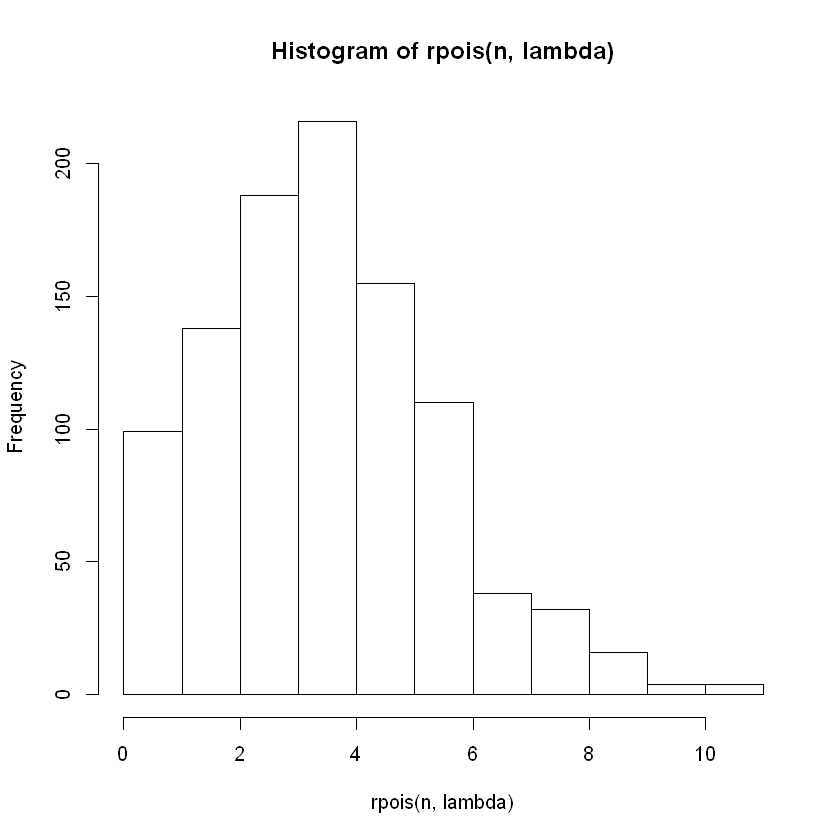

In [65]:
#let's create a dataframe because that plays nicely with ggplot    
datamns=data.frame(xmns=mns)
datamn=mean(datamns$xmns) # simulated sample mean

# you can see that poisson doesn't look normal if we create a random sample
hist(rpois(n,lambda))

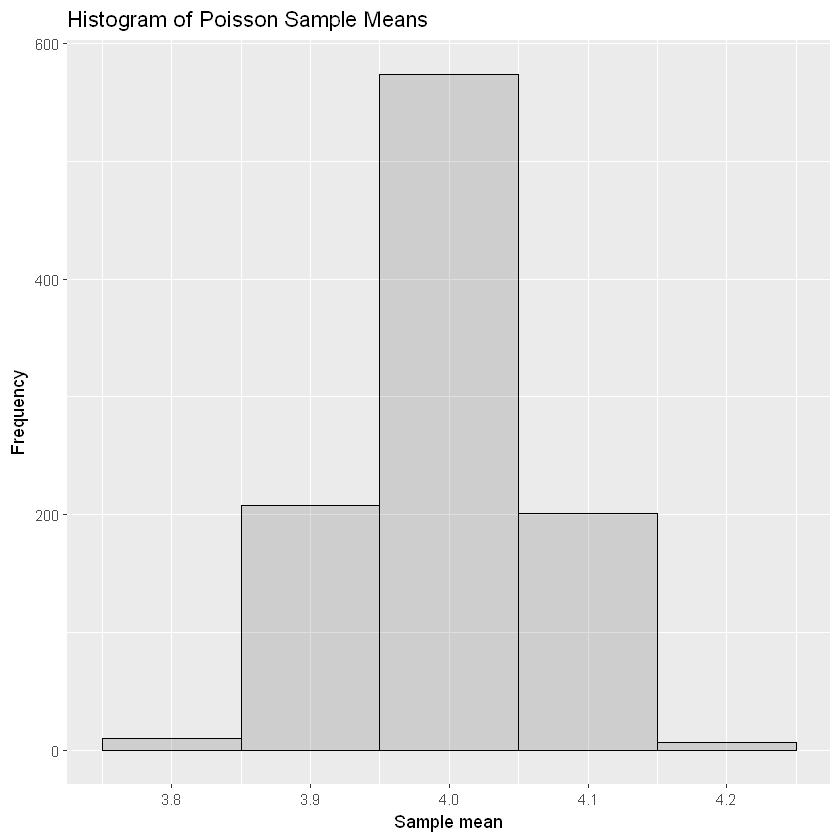

In [68]:
b = ggplot(datamns, aes(x = xmns)) +  geom_histogram(alpha = .20, binwidth=.1, colour = "black")+
        labs(x="Sample mean",y="Frequency")+
        ggtitle("Histogram of Poisson Sample Means")

b

In [69]:
datamn=round(mean(datamns$xmns),2)
cat("Theoretical mean:",lambda,", Experimental mean: ",datamn)

Theoretical mean: 4 , Experimental mean:  4

# Error

The error of an observed value is the deviation of the observed value from the true value of a quantity of interest

The residual of an observed value is the difference between the observed value and the estimated value

e.g. Population mean vs. sample mean

## Accuracy (bias) and precision (variability)

Accuracy is the proximity of measurement results to the true value

Precision is the repeatability, or reproducibility of the measurement

## Type I and II errors, precision and recall

true positive (TP): hit

true negative (TN): correct rejection

false positive (FP): false alarm, Type I error

false negative (FN): miss, Type II error

In [75]:
# let's make some data up by randomly sampling 100 times from the uniform distribution (runif)

actual = c('a','b','c')[runif(100, 1,4)] # actual labels
predicted = actual # predicted labels

head(predicted, n=40)

# now we're going to change 30 of them
predicted[runif(30,1,100)] = actual[runif(30,1,100)]  # introduce incorrect predictions
cm = as.matrix(table(Actual = actual, Predicted = predicted)) # create the confusion matrix
cm

[1] "b" "b" "a" "a" "b" "b" "b" "c" "a" "c" "b" "c" "b" "b" "a" "b" "a" "a" "b"
[20] "b" "b" "c" "a" "b" "c" "a" "b" "a" "a" "b" "a" "b" "b" "b" "c" "c" "c" "a"
[39] "a" "a"

      Predicted
Actual  a  b  c
     a 25  2  2
     b  2 38  4
     c  2  5 20

In [80]:
n = sum(cm) # number of instances
print(n)
nc = nrow(cm) # number of classes
print(nc)

diag = diag(cm) # number of correctly classified instances per class 
print(diag)

rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes

print(p)
print(q)

[1] 100
[1] 3
 a  b  c 
25 38 20 
   a    b    c 
0.29 0.44 0.27 
   a    b    c 
0.29 0.45 0.26 


Accuracy = TP + TN / (TP + TN + FP + FN)

In [81]:
accuracy = sum(diag) / n 

Precision = TP / (TP + FP)

In [82]:
precision = diag / colsums 

Recall = TP / (TP + FN)

In [83]:
recall = diag / rowsums 

In [84]:
cat("Accuracy:",accuracy,", Precision:",precision,", Recall:",recall)

Accuracy: 0.83 , Precision: 0.862069 0.8444444 0.7692308 , Recall: 0.862069 0.8636364 0.7407407

# Confirmatory Statistics

## Hypothesis testing

A type I error is the mishap of falsely rejecting a null hypothesis when the null hypothesis is true. 

The probability of committing a type I error is called the significance level of the hypothesis testing, denoted $\alpha$

## Confidence Intervals for normally distributed data

Given a sample mean, standard deviation, and the sample size, we wish to find the confidence interval on the mean.

$P ( s_{min} \leq s_{meas} \leq s_{max} ) = \alpha$

$\alpha = 95\%$

A normally distributed RV spends 95% of its time within 1.96 of the mean, therefore the 97.5 quantile of the normal distribution can be used for alpha of 5%

In [85]:
alpha = 0.05
print(qnorm(alpha/2))
print(qnorm(1-(alpha/2)))

[1] -1.959964
[1] 1.959964


In [86]:
s.mu = 5 #sample mean
s.sigma = 2 #sample standard deviation
s.N = 20 #sample size

$P ( \mu_s − 1.96\sigma_s \leq s_{meas} \leq \mu_s + 1.96\sigma_s ) = 95\%$

where $\sigma_s$ is the standard error of the mean

In [87]:
s.se = s.sigma/sqrt(s.N) #standard error

In [88]:
margin.of.error =  qnorm(1-(alpha/2))* s.se
print(margin.of.error)

[1] 0.8765225


In [89]:
leftCI = s.mu-margin.of.error

In [90]:
rightCI = s.mu+margin.of.error

In [91]:
cat("The true mean has a probability of 95% of being in the interval between ", leftCI, " and ", rightCI)

The true mean has a probability of 95% of being in the interval between  4.123477  and  5.876523

## Lower Tail Test of Population Mean with Unknown Variance

Suppose we wanted to test for significant difference between a sample mean with a population mean from theory

Our null hypothesis is

$\overline{X_n} \geq \mu_0$

where $\mu_0$ is a hypothesized lower bound of the true population mean $\mu$.

This is a 1-tail test because you are testing for statistical significance in only one direction of interest

A one-tailed test will test either if the sample mean is significantly greater than or significantly less than $\mu_0$, but not both. 

t = $\frac{\overline{X_n}-\mu}{\sigma/\sqrt{n}}$

Then the null hypothesis of the lower tail test is to be rejected if $t \leq −t\alpha$
    
where $t\alpha$ is the 100(1 − $\alpha$) percentile of the Student $t$ distribution with $n$ − 1 degrees of freedom.

In [92]:
#from above
s.mu = 5 #sample mean
s.sigma = 2 #sample standard deviation
s.N = 20 #sample size

mu0 = 7            # hypothesized value for population mean

# compute the test statistic
t = (s.mu - mu0)/(s.sigma/sqrt(s.N)) 
t

[1] -4.472136

### Degrees of freedom
The number of independent observations in a sample minus 
the number of population parameters that must be estimated from sample data

Here, the only population parameter is mu0, so df = n-1

In [93]:
alpha = .05 
t.alpha = qt(1-alpha, df=n-1) 
-t.alpha               # critical value 

[1] -1.660391

The test statistic -4.47 is less than the critical value of -1.66 

Hence, at .05 significance level, we can reject the claim that the population mean is 7

## Two-Tailed Test of Population Mean with Unknown Variance

Now our null hypothesis is

$\overline{X_n} = \mu_0$

This is a 2-tail test because you are testing for statistical significance in both directions

A two-tailed test will test either if the sample mean is **either** significantly greater than or significantly less than $\mu_0$

In [94]:
t.half.alpha = qt(1-alpha/2, df=n-1) 
c(-t.half.alpha, t.half.alpha) 

[1] -1.984217  1.984217

The test statistic -4.47 does not lie between the critical values -1.98, and +1.98. 

Hence, at .05 significance level, we reject the null hypothesis that the sample mean does not differ from population mean

## Last word: the p-value

The p-value cannot tell you if your hypothesis is correct. 
Instead, it’s the probability of your data given your hypothesis. 

Is the pope Catholic? The answer is probably yes

(data = there is a pope
hypothesis = he is catholic)

It is not the same thing as "the probability of your hypothesis given your data"

Is a Catholic the pope? The answer is probably not. 

(data = there is a catholic
hypothesis = he is the pope)

Source: http://fivethirtyeight.com/features/statisticians-found-one-thing-they-can-agree-on-its-time-to-stop-misusing-p-values/

In [ ]:
##http://www.nature.com/news/statisticians-issue-warning-over-misuse-of-p-values-1.19503

In [2]:
##shell.exec("http://www.nature.com/nmeth/journal/v14/n1/pdf/nmeth.4120.pdf")

In [ ]:
##https://fivethirtyeight.com/features/science-isnt-broken/#part1